# SF salaries exercise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('Salaries.csv')

*Check the head of the DataFrame*

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


What is the average Basepay??

In [5]:
sal['BasePay'].mean()

66325.44884050643

** What is the highest amount of OvertimePay in the dataset ? **

In [6]:
sal['OvertimePay'].max()

245131.88

** What is the job title of JOSEPH DRISCOLL ?**

In [7]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [8]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [9]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


** What is the name of lowest paid person (including benefits)?**

In [10]:
sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


** How many unique job titles are there? **

In [11]:
len(sal['JobTitle'].unique()) #or sal['JobTitle'].nunique()

2159

** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


Text(0.5, 1.0, 'BasePay Avg.')

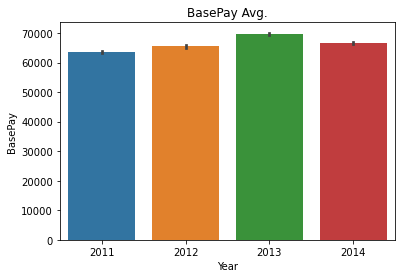

In [12]:
print(sal.groupby('Year')['BasePay'].mean())
sns.barplot(x='Year',y='BasePay',data=sal)
plt.title('BasePay Avg.')
#BasePay increased for three years but then dropped

** What are the top 5 most common jobs? **

In [13]:
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** What was the average (mean) OvertimePay of all employees per year? (2011-2014) ? **

Year
2011    4531.065429
2012    5023.417824
2013    5281.641980
2014    5401.993737
Name: OvertimePay, dtype: float64


Text(0.5, 1.0, 'OvertimePay Avg.')

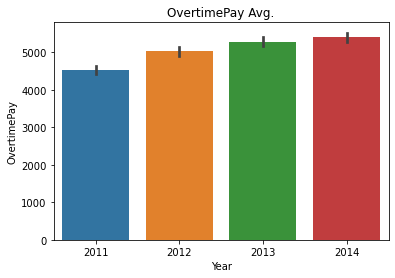

In [14]:
print(sal.groupby('Year').mean()['OvertimePay'])
sns.barplot(x='Year',y='OvertimePay',data=sal)
plt.title('OvertimePay Avg.')
# here we can see that overtime is increasing year by year

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100250.918884
Name: TotalPayBenefits, dtype: float64


Text(0.5, 1.0, 'TotalPayBenefits Avg.')

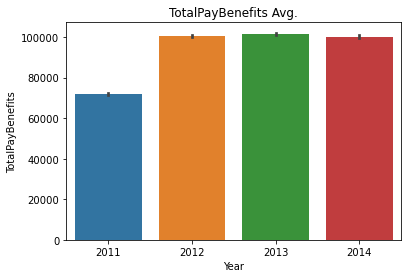

In [15]:
# ** What was the average (mean) TotalPayBenefits of all employees per year? (2011-2014) ? **

print(sal.groupby('Year')['TotalPayBenefits'].mean())
sns.barplot(x='Year',y='TotalPayBenefits',data=sal)
plt.title('TotalPayBenefits Avg.')

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [16]:
sum(sal[sal['Year']==2013]['JobTitle'].value_counts() == 1)

202

** How many people have the word Chief in their job title? **

In [17]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

In [18]:
sum(sal['JobTitle'].apply(lambda x: chief_string(x)))

627

** Is there a correlation between length of the Job Title string and Salary? **

In [19]:
sal['title_len'] = sal['JobTitle'].apply(len)

In [20]:
sal[['JobTitle','title_len']].corr()

,title_len
title_len,1.0


In [26]:
sal_corr = sal[['title_len','TotalPayBenefits']].corr() # No correlation
sal_corr

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


<AxesSubplot:>

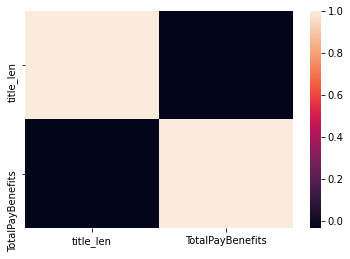

In [28]:
sns.heatmap(sal_corr)

<AxesSubplot:xlabel='TotalPayBenefits', ylabel='Density'>

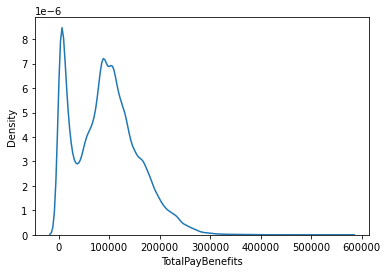

In [22]:
sns.kdeplot(sal['TotalPayBenefits'])
# we can see that as the totalpaybenefits increases, its density decreases

### TotalPay by JobTitle
Here I compare the TotalPay with each Job Title, then grouping the Job Title and get the max, min, and avg of TotalPay

In [23]:
display(sal[["JobTitle","TotalPay","Year",]].groupby(["JobTitle","Year"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="CMRmap_r"))